Problem statement

you have been provided purchae data for various customers across av ertical. you need to apply learnings from data manipulation , data visualization and statistical analysis to come up with actionabe insights about the data.


Task to be performed:

1) Perform  detailed EDA for the data with inferences from each of the actions
2) Using statistical analysis, find out statistical evidnece for the following :

$was observed the average purchase made by men of age 18-25 was 10000 , is it still same?

$was observed that the percentage of women of age that spend more than 10000 was 35% , is it still same?

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv("train.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [40]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [41]:
data.shape

(550068, 12)

In [42]:
print(type(data)) 

<class 'pandas.core.frame.DataFrame'>


# EDA - Exploratory Data Analysis

To Understand the data

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [44]:
# to check null values
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [45]:
# product_category_2 and  product_category_3 have null values. 

In [46]:
data.isnull().sum().sum()

# for one more sum give the total number of null value in data

556885

In [47]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [48]:
# it gives all the unique values of Stay_In_Current_City_Years column.

In [49]:
# we can see that 4+ is improper data o replcae it 

In [50]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+','4')

In [51]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [52]:
# type is object we can;t compute anything from object type so

In [53]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)

In [54]:
# [input]as.type(abc) is used to change the input to abc type.

In [55]:
data['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [56]:
print(type(data['Stay_In_Current_City_Years'].unique()))  # array.

<class 'numpy.ndarray'>


In [57]:
# before filling null values change the necesaary data type is important.
# we are converting our object type data into int type data.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 48.3+ MB


In [59]:
# Encoding Techniques

In [60]:
data = data.dropna()  #drop all the null values.
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
545902,1006039,P00064042,F,46-50,0,B,4,1,3,4.0,12.0,8047
545904,1006040,P00081142,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,1006040,P00277642,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,1006040,P00127642,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [61]:
# dropna() drop all the rows containing Null / Zero in it.

In [62]:
data.shape

(166821, 12)

In [63]:
data.count()

User_ID                       166821
Product_ID                    166821
Gender                        166821
Age                           166821
Occupation                    166821
City_Category                 166821
Stay_In_Current_City_Years    166821
Marital_Status                166821
Product_Category_1            166821
Product_Category_2            166821
Product_Category_3            166821
Purchase                      166821
dtype: int64

In [64]:
# similarly apart from dropping we handle them be filling.
# .fillna(x) where x can be mean , median etc...

In [65]:
data['Gender'].count()  # count the total no. of entries in column - Gender

166821

In [66]:
data['Gender'].value_counts()  # count the values separtely in column.

Gender
M    129227
F     37594
Name: count, dtype: int64

In [67]:
# Label encoding techniques
'''
Label each entries of column; 
M = 1
F = 0
by this we change the datatype from object to numeric.
'''

'\nLabel each entries of column; \nM = 1\nF = 0\nby this we change the datatype from object to numeric.\n'

In [68]:
data['Gender'].unique()  # as it is object let's change it to numeric

array(['F', 'M'], dtype=object)

In [69]:
data.head(1) 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [70]:
# by label encoding.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # variable.


In [71]:
data['Gender'] = le.fit_transform(data['Gender'])  #its done.

C:\Users\DELL\AppData\Local\Temp\ipykernel_31088\3793330966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = le.fit_transform(data['Gender'])  #its done.


In [72]:
data['Gender'].value_counts()

Gender
1    129227
0     37594
Name: count, dtype: int64

In [74]:
# we can see that Male changed to 1 and female is given as 0 
# bcz in first row female is there so F = 0 and M = 1.

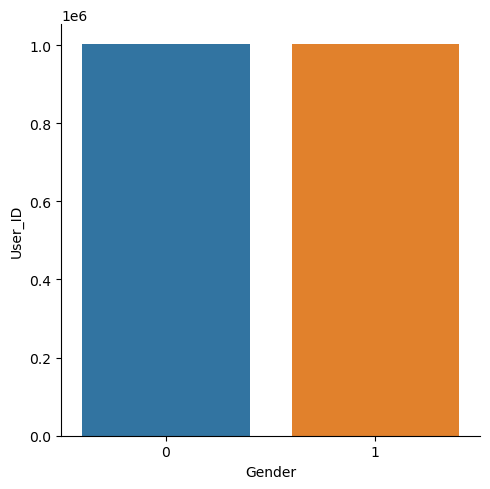

In [84]:
sns.catplot(data = data , x = 'Gender' , y = 'User_ID' , kind = 'bar')
# allows you to visualize categorical data in various ways, such as bar plots, box plots, and violin

In [83]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
545902,1006039,P00064042,0,46-50,0,B,4,1,3,4.0,12.0,8047
545904,1006040,P00081142,1,26-35,6,B,2,0,6,8.0,14.0,16493
545907,1006040,P00277642,1,26-35,6,B,2,0,2,3.0,10.0,3425
545908,1006040,P00127642,1,26-35,6,B,2,0,1,2.0,15.0,15694
545914,1006040,P00217442,1,26-35,6,B,2,0,1,2.0,11.0,11640


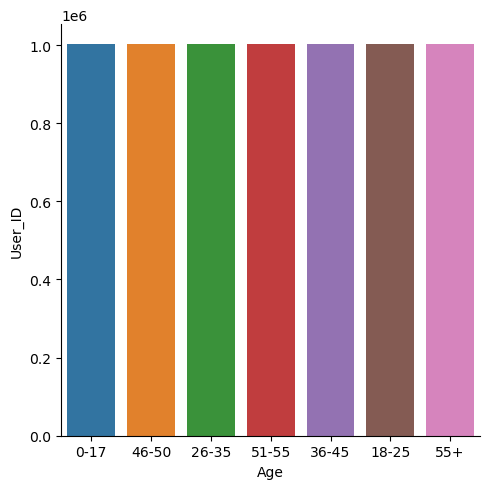

In [85]:
sns.catplot( data = data , x = 'Age' , y = 'User_ID' , kind = 'bar')

AttributeError: 'numpy.int32' object has no attribute 'startswith'

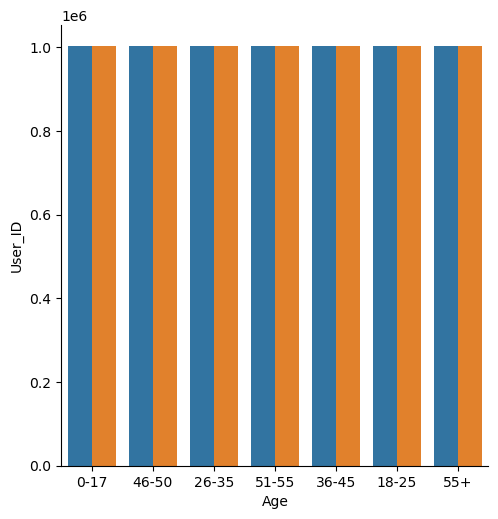

In [95]:
sns.catplot(
    data=data,
    x='Age',           # Column to be plotted on the x-axis
    y='User_ID',       # Column to be plotted on the y-axis
    hue='Gender',      # Column used for color encoding
    kind='bar',        # Type of plot (bar plot in this case)
)

In [90]:
data['Age'].value_counts()

Age
26-35    66942
36-45    33285
18-25    31316
46-50    13374
51-55    11166
55+       5865
0-17      4873
Name: count, dtype: int64

In [91]:
# value.counts() sort the list defautly.

# CASE 1

observed the average purchase made by men of age 18-25 was 10000 , is it still same?

In [96]:
data['Age'] = le.fit_transform(data['Age'])  #its done.

C:\Users\DELL\AppData\Local\Temp\ipykernel_31088\219870782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = le.fit_transform(data['Age'])  #its done.


In [97]:
# as per there order age named as 0,1,2,3,4.

In [98]:
data['Age'].value_counts()

Age
2    66942
3    33285
1    31316
4    13374
5    11166
6     5865
0     4873
Name: count, dtype: int64

In [102]:
df = data.loc[(data['Age']==1) & data['Gender']==1]

In [101]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
98,1000022,P00351142,1,1,15,A,4,0,1,8.0,17.0,12099
103,1000022,P00262242,1,1,15,A,4,0,1,11.0,16.0,12098
111,1000022,P00225842,1,1,15,A,4,0,2,4.0,15.0,9564
127,1000025,P00206442,1,1,4,C,4,0,1,5.0,9.0,15361
128,1000025,P00046742,1,1,4,C,4,0,1,2.0,15.0,15770
...,...,...,...,...,...,...,...,...,...,...,...,...
545425,1005964,P00034442,1,1,5,B,1,0,1,14.0,16.0,15420
545427,1005964,P00193642,1,1,5,B,1,0,2,3.0,4.0,15973
545428,1005964,P00161542,1,1,5,B,1,0,2,15.0,16.0,6847
545430,1005964,P00163542,1,1,5,B,1,0,2,4.0,5.0,13276


In [104]:
df.shape

(24239, 12)

In [113]:
sample_size = 30
pop_mean = 10000  #given so using T-Test.
sample = df.sample(sample_size ,random_state = 0) 

In [106]:
sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
34785,1005367,P00010542,1,1,4,A,1,0,2,4.0,5.0,6928
286087,1002015,P00342242,1,1,4,B,4,0,11,15.0,16.0,4437
220342,1003965,P00112642,1,1,11,C,3,0,1,2.0,5.0,11503
348062,1005607,P00112642,1,1,4,C,2,0,1,2.0,5.0,15754
196742,1000355,P00070042,1,1,3,B,2,0,1,2.0,16.0,15479
14570,1002163,P00136742,1,1,0,C,0,1,1,14.0,16.0,15788
409108,1002996,P00112142,1,1,0,B,1,0,1,2.0,14.0,19055
315023,1000555,P00350942,1,1,4,B,4,0,3,4.0,5.0,13248
104630,1004101,P00057642,1,1,4,C,3,0,1,15.0,16.0,15385
3024,1000496,P00127442,1,1,4,A,3,0,1,2.0,15.0,19687


In [107]:
from scipy.stats import ttest_1samp

In [117]:
t_stats,p_value = ttest_1samp(sample['Purchase'],pop_mean)

# t_stat, p_value = ttest_1samp(sample_data, population_mean)

In [115]:
p_value

0.2010399294467768

In [116]:
# we can see that p_value is greater than alpha 0.05 , so accept the null hypothesis.

# CASE 2

$was observed that the percentage of women of age that spend more than 10000 was 35% , is it still same?

In [119]:
df2 = data.loc[(data['Purchase']>10000)]

In [120]:
df2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,1,4,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,1,2,20,A,1,1,1,2.0,5.0,15665
16,1000006,P0096642,0,5,9,A,1,0,2,3.0,4.0,13055
18,1000007,P00036842,1,3,1,B,1,1,1,14.0,16.0,11788
...,...,...,...,...,...,...,...,...,...,...,...,...
545887,1006036,P00127742,0,2,15,B,4,1,1,2.0,15.0,11398
545892,1006037,P00148642,0,4,1,C,4,0,6,10.0,13.0,11952
545904,1006040,P00081142,1,2,6,B,2,0,6,8.0,14.0,16493
545908,1006040,P00127642,1,2,6,B,2,0,1,2.0,15.0,15694


In [122]:
from statsmodels.stats.proportion import proportions_ztest

In [128]:
count = df2['Gender'].value_counts()[0]   #count of total women.

In [129]:
count

21124

In [130]:
total_ = len(data['Gender'])

In [131]:
total_

166821

In [132]:
p0 = 0.35 # given pop details

In [135]:
z_stats , p_value = proportions_ztest(count = count , nobs = total_ , value = p0 , alternative = 'two-sided')

In [136]:
p_value

0.0

In [137]:
# hence p_value is less than alpha and reject NULL HYPOTHESIS 
# and observed that percentage value changed now.